In [1]:
#importing required libraries
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
# importing data data
df = pd.read_csv('TATAMOTORS.csv')

In [3]:
df.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,11-Oct-2021,EQ,390.15,420.90,388.00,382.95,417.8,415.75,411.01,420.90,126.0,113404983,"46,610,095,970.25",834399
1,08-Oct-2021,EQ,385.90,397.55,380.00,376.50,382.8,382.95,386.46,397.55,126.0,93728117,"36,222,633,520.35",714038
2,07-Oct-2021,EQ,341.10,383.00,339.25,336.05,378.5,376.50,368.30,383.00,126.0,163238084,"60,120,343,470.50",1028809
3,06-Oct-2021,EQ,347.00,348.70,335.00,344.95,335.6,336.05,340.48,360.75,126.0,25272592,"8,604,815,719.30",213910
4,05-Oct-2021,EQ,340.45,351.50,338.85,342.00,345.0,344.95,346.53,360.75,126.0,31861985,"11,041,234,205.50",266202


In [4]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [5]:
df_train =df.loc[::-1].reset_index(drop=True)

### We will implement this technique on our dataset. The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and validation sets to verify our predictions.

In [6]:
df_train['close ']

0      135.90
1      134.10
2      130.70
3      126.95
4      127.75
        ...  
244    344.95
245    336.05
246    376.50
247    382.95
248    415.75
Name: close , Length: 249, dtype: float64

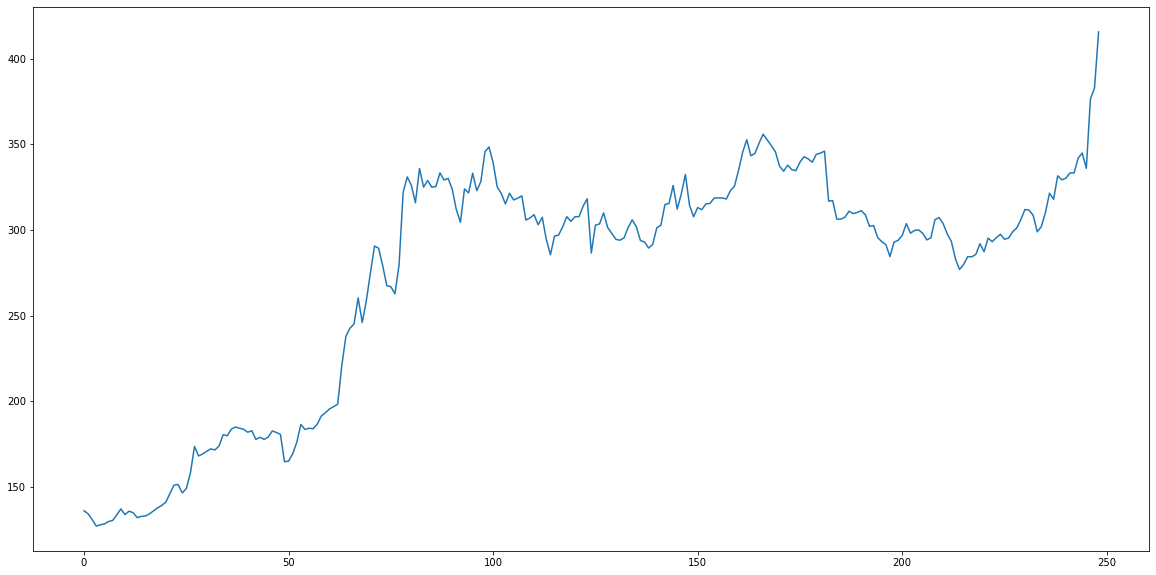

In [10]:
df1 =df_train['close ']
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.0309903 ],
       [0.02475762],
       [0.01298476],
       [0.        ],
       [0.00277008],
       [0.00450139],
       [0.00934903],
       [0.01142659],
       [0.02268006],
       [0.03479917],
       [0.02337258],
       [0.03012465],
       [0.02718144],
       [0.01713989],
       [0.01973684],
       [0.02042936],
       [0.02475762],
       [0.0309903 ],
       [0.03704986],
       [0.04172438],
       [0.04864958],
       [0.0659626 ],
       [0.08310249],
       [0.08396814],
       [0.06717452],
       [0.07583102],
       [0.10751385],
       [0.16118421],
       [0.14196676],
       [0.14594875],
       [0.15148892],
       [0.15616343],
       [0.15408587],
       [0.16204986],
       [0.18490305],
       [0.18282548],
       [0.19615651],
       [0.20048476],
       [0.19806094],
       [0.19598338],
       [0.18992382],
       [0.19304017],
       [0.17538089],
       [0.17970914],
       [0.17555402],
       [0.17988227],
       [0.19252078],
       [0.189

In [15]:
##splitting dataset into train and test split
train_size = int(len(df1)* 0.65)
test_size = len(df1)-train_size

train_data , test_data = df1[:train_size,:],df1[train_size:,]

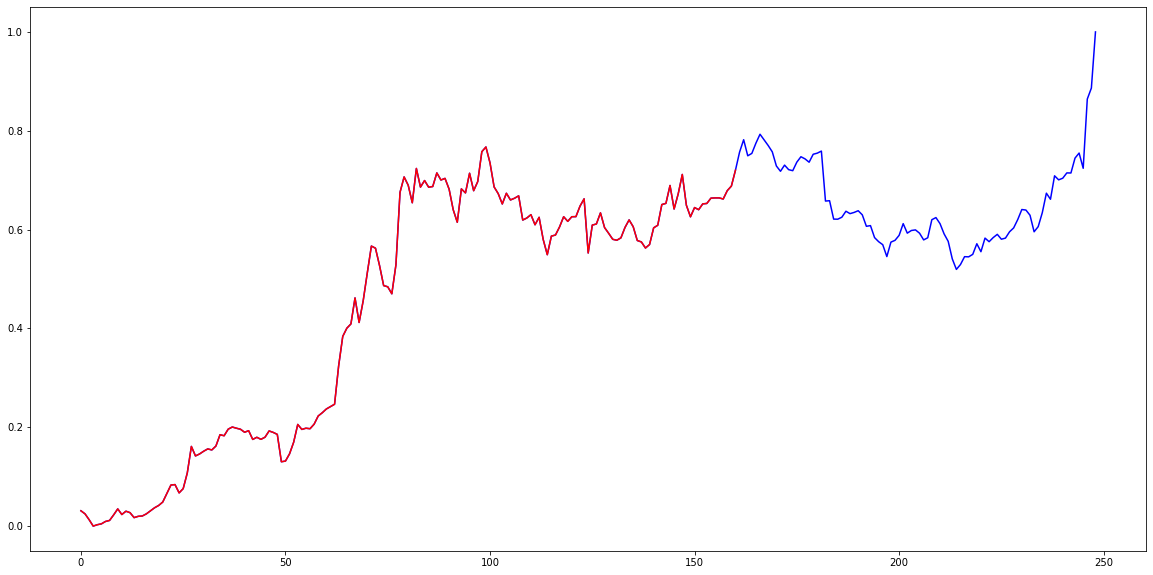

In [22]:
#plotting graph
plt.plot(df1,color= 'blue')
plt.plot(train_data,color='red')


## Long Short Term Memory (LSTM)

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step =1):
        data_X, data_Y = [],[]
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0] 
            
            data_X.append(a)
            data_Y.append(dataset[i+ time_step, 0])
        return numpy.array(data_X), numpy.array(data_Y)

In [26]:
# reshape into X = t, t+1, t+2 ,t+3 and Y= t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(60, 100)
(60,)


(None, None)

In [29]:
print(X_test.shape), print(y_test.shape)

(0,)
(0,)


(None, None)